In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

realtor_data = pd.read_csv('RDC_Inventory_Core_Metrics_Metro_History.csv')
realtor_data.columns

Index(['year_month', 'year', 'month', 'cbsa_code', 'cbsa_title', 'state',
       'HouseholdRank', 'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm',
       'new_listing_count_yy', 'price_increased_count',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'av

In [2]:
primary_data = realtor_data[['year_month','year','month','cbsa_title','state','median_listing_price','average_listing_price','active_listing_count',
                            'total_listing_count','median_days_on_market',
                            'new_listing_count','price_increased_count','price_reduced_count','pending_listing_count']]

florida_data = primary_data.loc[primary_data['state']=='FL']
sorted(florida_data['cbsa_title'].unique())

['Arcadia, FL',
 'Cape Coral-Fort Myers, FL',
 'Clewiston, FL',
 'Crestview-Fort Walton Beach-Destin, FL',
 'Deltona-Daytona Beach-Ormond Beach, FL',
 'Gainesville, FL',
 'Homosassa Springs, FL',
 'Jacksonville, FL',
 'Key West, FL',
 'Lake City, FL',
 'Lakeland-Winter Haven, FL',
 'Miami-Fort Lauderdale-Pompano Beach, FL',
 'Naples-Marco Island, FL',
 'North Port-Sarasota-Bradenton, FL',
 'Ocala, FL',
 'Okeechobee, FL',
 'Orlando-Kissimmee-Sanford, FL',
 'Palatka, FL',
 'Palm Bay-Melbourne-Titusville, FL',
 'Panama City, FL',
 'Pensacola-Ferry Pass-Brent, FL',
 'Port St. Lucie, FL',
 'Punta Gorda, FL',
 'Sebastian-Vero Beach, FL',
 'Sebring-Avon Park, FL',
 'Tallahassee, FL',
 'Tampa-St. Petersburg-Clearwater, FL',
 'The Villages, FL',
 'Wauchula, FL']

In [4]:
city = 'Orlando-Kissimmee-Sanford, FL'    #COPY AND PASTE A CITY FROM ABOVE AND RUN

city_data = florida_data.loc[florida_data['cbsa_title']== city]
city_data.head()

,year_month,year,month,cbsa_title,state,median_listing_price,average_listing_price,active_listing_count,total_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count
24,202303,2023,Mar,"Orlando-Kissimmee-Sanford, FL",FL,440995,618798,5942,11629,54,3890,294,2140,5703.0
951,202302,2023,Feb,"Orlando-Kissimmee-Sanford, FL",FL,434950,602121,6418,11722,65,3884,260,2516,5307.0
1878,202301,2023,Jan,"Orlando-Kissimmee-Sanford, FL",FL,429500,591525,6845,10924,73,3600,232,2934,4085.0
2805,202212,2022,Dec,"Orlando-Kissimmee-Sanford, FL",FL,431000,582124,7375,11497,68,2768,184,2552,4123.0
3732,202211,2022,Nov,"Orlando-Kissimmee-Sanford, FL",FL,439772,581510,7840,12305,62,3210,168,3270,4477.0


C:\Users\Jesse\AppData\Local\Temp\ipykernel_28420\279366262.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')


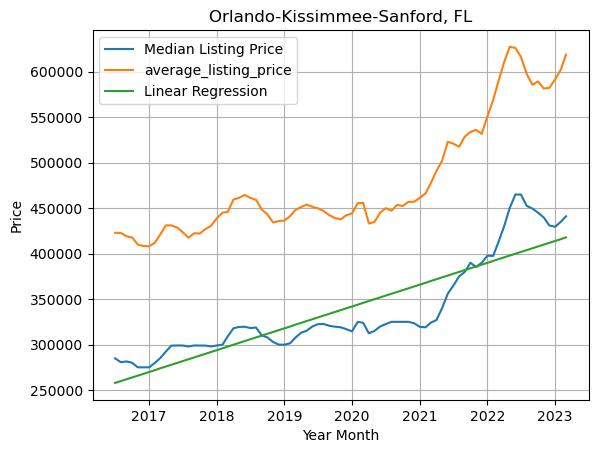

In [8]:
# # convert year_month to date format
# city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')

# # create the plot
# plt.plot(city_data['year_month'], city_data['median_listing_price'], label='Median Listing Price')
# plt.plot(city_data['year_month'], city_data['average_listing_price'], label='average_listing_price')

# # add legend and labels
# plt.xlabel('Year Month')
# plt.ylabel('Price')
# plt.title(city)
# plt.legend()
# plt.grid()
# # show the plot
# plt.show()

city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')

plt.plot(city_data['year_month'], city_data['median_listing_price'], label='Median Listing Price')
plt.plot(city_data['year_month'], city_data['average_listing_price'], label='average_listing_price')

# linear regression
x = np.arange(len(city_data))
y = city_data['median_listing_price']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(city_data['year_month'], slope*x + intercept, label='Linear Regression')

plt.xlabel('Year Month')
plt.ylabel('Price')
plt.title(city)
plt.legend()
plt.grid()

plt.savefig("Orlando-Kissimmee.png")
plt.show()


C:\Users\Jesse\AppData\Local\Temp\ipykernel_28420\158393588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')


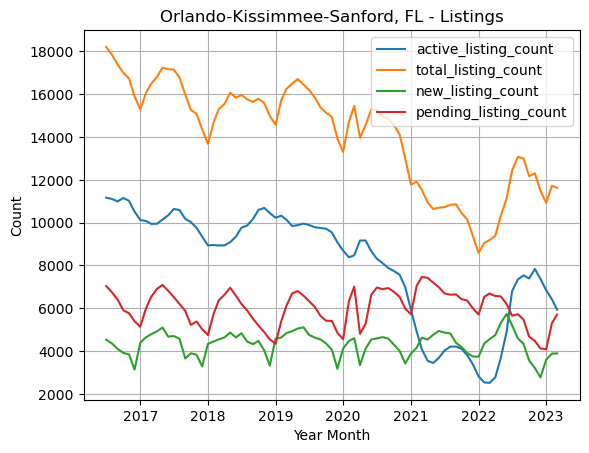

In [9]:
# convert year_month to date format
city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')

# create the plot 
plt.plot(city_data['year_month'], city_data['active_listing_count'], label='active_listing_count')
plt.plot(city_data['year_month'], city_data['total_listing_count'], label='total_listing_count')
plt.plot(city_data['year_month'], city_data['new_listing_count'], label='new_listing_count')
plt.plot(city_data['year_month'], city_data['pending_listing_count'], label='pending_listing_count')


# add legend and labels
plt.xlabel('Year Month')
plt.ylabel('Count')
plt.title(city + ' - ' + 'Listings' )
plt.legend()
plt.grid()
# show the plot
plt.savefig("Orlando-Kissimmee_FL_Listing.png")
plt.show()

C:\Users\Jesse\AppData\Local\Temp\ipykernel_28420\3803004967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')


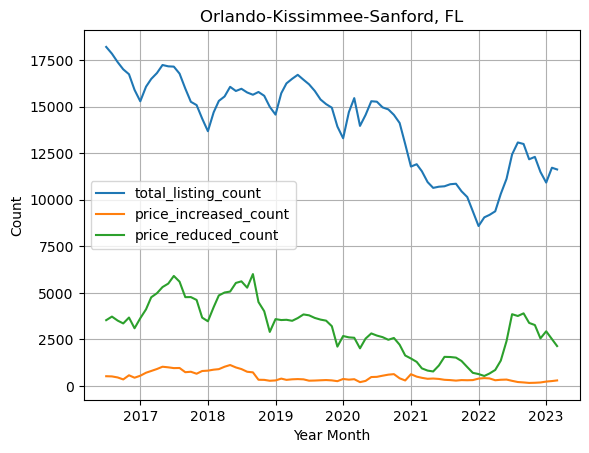

In [10]:
# convert year_month to date format
city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')

# create the plot
plt.plot(city_data['year_month'], city_data['total_listing_count'], label='total_listing_count')
plt.plot(city_data['year_month'], city_data['price_increased_count'], label='price_increased_count')
plt.plot(city_data['year_month'], city_data['price_reduced_count'], label='price_reduced_count')

# add legend and labels
plt.xlabel('Year Month')
plt.ylabel('Count')
plt.title(city)
plt.legend()
plt.grid()
# show the plot
plt.savefig("Orlando-Kissimmee_FL.png")
plt.show()


C:\Users\Jesse\AppData\Local\Temp\ipykernel_28420\683615976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')


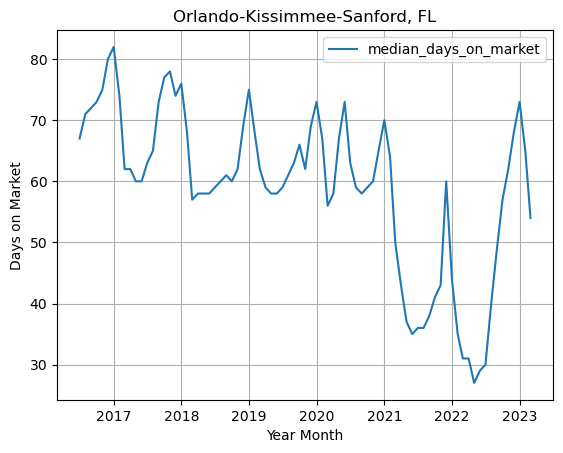

In [11]:
# convert year_month to date format
city_data['year_month'] = pd.to_datetime(city_data['year_month'], format='%Y%m')

# create the plot
plt.plot(city_data['year_month'], city_data['median_days_on_market'], label='median_days_on_market')


# add legend and labels
plt.xlabel('Year Month')
plt.ylabel('Days on Market')
plt.title(city)
plt.legend()
plt.grid()
# show the plot
plt.savefig("Orlando-Kissimmee_days_on_market.png")
plt.show()

In [150]:
aggregations = {
    'median_listing_price': 'mean',
    'average_listing_price': 'mean',
    'active_listing_count': 'mean',
    'total_listing_count': 'sum',
    'median_days_on_market': 'mean',
    'new_listing_count': 'sum',
    'price_increased_count': 'sum',
    'price_reduced_count': 'sum',
    'pending_listing_count': 'sum'
}

# Group the data by 'year_month', 'cbsa_title', and 'state', and apply the aggregations
grouped_data = city_data.groupby(['year', 'cbsa_title']).agg(aggregations)
#city_aggregation = grouped_data.loc[grouped_data['']]

# Print the result
grouped_data


,,median_listing_price,average_listing_price,active_listing_count,total_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count
year,cbsa_title,,,,,,,,,
2016,"Orlando-Kissimmee-Sanford, FL",279499.000000,416787.333333,10993.833333,103117,73.000000,23882,2842,20888,37267.0
2017,"Orlando-Kissimmee-Sanford, FL",293489.583333,422867.083333,10094.333333,193705,69.166667,52476,9860,57632,72722.0
2018,"Orlando-Kissimmee-Sanford, FL",310218.083333,449727.416667,9645.500000,184905,62.166667,52914,9058,56502,69308.0
2019,"Orlando-Kissimmee-Sanford, FL",314864.833333,444988.583333,9846.583333,187683,63.333333,54680,3816,41490,69689.0
2020,"Orlando-Kissimmee-Sanford, FL",321410.750000,448784.083333,8263.666667,174070,63.166667,50768,4984,29476,74708.0
2021,"Orlando-Kissimmee-Sanford, FL",355869.750000,507448.000000,4112.750000,129931,46.083333,52852,4564,14086,80620.0
2022,"Orlando-Kissimmee-Sanford, FL",436272.833333,593753.916667,5291.583333,132152,41.916667,52112,3364,27172,68405.0
2023,"Orlando-Kissimmee-Sanford, FL",435148.333333,604148.000000,6401.666667,34275,64.000000,11374,786,7590,15095.0


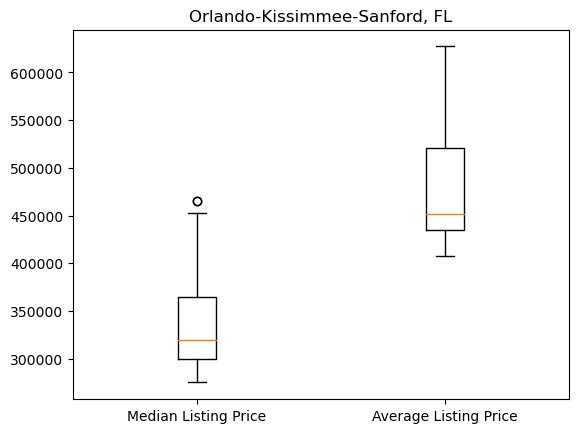

In [12]:
grouped = city_data.groupby('cbsa_title')

# Create a boxplot for median and average listing price for each city
for name, group in grouped:
    data = [group['median_listing_price'], group['average_listing_price']]
    plt.boxplot(data)
    plt.xticks([1, 2], ['Median Listing Price', 'Average Listing Price'])
    plt.title(name)
    plt.savefig("Orlando-Kissimmee_box_plot.png")
    plt.show()


In [13]:
quartiles = city_data['median_listing_price'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = lowerq + (1.5 * iqr)

print('The below statictics are for ' + city)
print(f'The lower quartile of city_data is : {lowerq}')
print(f'The upper quartile of city_data is : {upperq}')
print(f'The interquartile range of city_data is : {iqr}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')

The below statictics are for Orlando-Kissimmee-Sanford, FL
The lower quartile of city_data is : 299950.0
The upper quartile of city_data is : 364800.0
The interquartile range of city_data is : 64850.0
Values below 202675.0 could be outliers
Values above 397225.0 could be outliers


In [14]:
cities2 = ['Lakeland-Winter Haven, FL','Lakeland-Winter Haven, FL']    #To run multiple cities

city_data = florida_data.loc[florida_data['cbsa_title'].isin(cities2)]
city_data.head()

,year_month,year,month,cbsa_title,state,median_listing_price,average_listing_price,active_listing_count,total_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count
79,202303,2023,Mar,"Lakeland-Winter Haven, FL",FL,349950,408486,2725,4883,58,1432,170,1054,2175.0
1006,202302,2023,Feb,"Lakeland-Winter Haven, FL",FL,349000,400954,2897,4942,69,1492,170,1214,2046.0
1933,202301,2023,Jan,"Lakeland-Winter Haven, FL",FL,349000,400464,2996,4683,72,1510,84,1418,1690.0
2860,202212,2022,Dec,"Lakeland-Winter Haven, FL",FL,349900,397417,3073,4748,69,1200,88,1272,1674.0
3787,202211,2022,Nov,"Lakeland-Winter Haven, FL",FL,351500,400392,3103,4893,62,1358,66,1630,1792.0


In [15]:
slope, intercept, r_value, p_value, std_err = linregress(city_data['median_listing_price'], city_data['active_listing_count'])

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard error:", std_err)

Slope: -0.007524147257259451
Intercept: 4338.056382675153
R-squared: 0.26479915391776926
p-value: 8.902665058519165e-07
Standard error: 0.0014105498644741909
